# Python Machine Learning for Biology
# Random Forests

#### Load the iris dataset

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
iris = pd.read_csv("data/iris.csv")

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Create independent (labels) and dependent (features) variables

In [7]:
X=iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [8]:
y=iris['species']  # Labels

#### Split dataset into training set and test set (70% training, 30% test)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

#### Train the model on the training set
**Key Parameters**
* `n_estimators`: number of trees used (default is 10) -- should be larger for larger datasets to avoid overfitting
* `max_features`: influences diversity of trees in the forest -- has a strong effect on performance (default works well most of the time, but smaller will help reduce overfitting)
* `max_depth`: controls the depth of each tree (default is None, which means it will split with each leaf is pure)

In [11]:
clf=RandomForestClassifier(n_estimators=100)

In [12]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Create predictions on the test set

In [13]:
y_pred=clf.predict(X_test)

#### Check the accuracy using actual and predicted values

In [15]:
print(metrics.accuracy_score(y_test, y_pred))

0.933333333333


#### Feature importance

We can use random forests to find the most important features of the dataset.

1. Create a random forests model (did this above)
2. Use the feature importance variable to see feature importance scores
3. Visualize these scores using the seaborn library

In [28]:
feature_names = iris.columns[0:4]

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [30]:
feature_imp = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)

In [31]:
feature_imp

petal_length    0.442053
petal_width     0.426579
sepal_length    0.108435
sepal_width     0.022933
dtype: float64

#### Create a bar plot of feature importance

/Users/nicholebennett/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


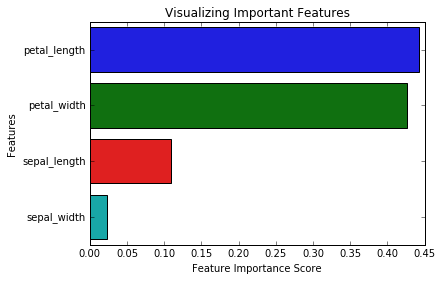

In [35]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Looks like we could do without "sepal width." We can remove it and fit again if we like

# Independent Work

Fit a random forest for the car dataset

In [36]:
car = pd.read_csv('data/car.csv')

In [37]:
car.head()

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
